# Сборный проект 1

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# [1. Откройте файл с данными и изучите общую информацию](#stage_1)

Путь к файлу: /datasets/games.csv.

# [2. Подготовьте данные](#stage_2)

- Замените названия столбцов (приведите к нижнему регистру);
- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- Обработайте пропуски при необходимости:
    - Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
    - Опишите причины, которые могли привести к пропускам;
    - Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

# [3. Проведите исследовательский анализ данных](#stage_3)

- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

# [4. Составьте портрет пользователя для каждого региона](#stage_4)

Определите для пользователя каждого региона (NA, EU, RU):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

# [5. Проверьте гипотезы](#stage_5)

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.  
  
Задайте самостоятельно пороговое значение alpha.  
  
Поясните:
- Как вы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.

# [6. Напишите общий вывод](#stage_6)

# Описание данных:

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- RU_sales — продажи в России (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. 
  
Данные за 2016 год могут быть неполными.

# Этап 1. Откроем файлы, импортируем библиотеки

- Изучим общую информацию
- Посмотрим на оформление

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats as st

In [2]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
df = pd.read_csv('/datasets/games.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,nan,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,nan,NaN,NaN


In [5]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,"16,446.00","16,715.00","16,715.00","16,715.00","16,715.00","8,137.00"
mean,"2,006.48",0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,"1,980.00",0.00,0.00,0.00,0.00,13.00
25%,"2,003.00",0.00,0.00,0.00,0.00,60.00
50%,"2,007.00",0.08,0.02,0.00,0.01,71.00
75%,"2,010.00",0.24,0.11,0.04,0.03,79.00
max,"2,016.00",41.36,28.96,10.22,10.57,98.00


Есть пропущенные значения и некорректные типы данных. Нужна предобработка. 

# Этап 2. Подготовка данных

- Замените названия столбцов (приведите к нижнему регистру);
- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;  

- Обработайте пропуски при необходимости:  
  
    - Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
    - Опишите причины, которые могли привести к пропускам;
    - Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;
    
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [6]:
#Приведем названия столбцов к нижнему регистру
cols = ['game_name',
        'platform',
        'year_of_release',
        'genre',
        'na_sales',
        'eu_sales',
        'ru_sales',
        'other_sales',
        'critic_score',
        'user_score',
        'rating_type']
df.set_axis(cols, axis='columns', inplace=True)

In [7]:
#в данных по годам есть пропущенные значения
df['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

Поставим метку по которым можно определить пустые значения. Заполнять какой-то датой не имеет смысла так как может отразится на результатах. В качестве метки выберем 9999.

In [8]:
df['year_of_release'] = df['year_of_release'].fillna(9999)
df['year_of_release'] = df['year_of_release'].astype('int')

In [9]:
#Посмотрим на столбец с рейтингом пользователей
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Есть значение tbd, не знаю что оно означает, но перевести в вещественный тип не даст. Заменю на nan, 0 ипользовать нельзя т.к есть пользовательская оценка 0. Заменим nan на -1, тоже не имеет смысла, потому что не знаю откуда он появился возможн пользователи или критики решили не давать свою оценку этой игре. Переведем в вещественный тип.

In [10]:
df[df['user_score'] == 'tbd']['user_score'].count()

2424

In [11]:
df.loc[df['user_score'] == 'tbd','user_score'] = np.nan
df['user_score'] = df['user_score'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
game_name          16713 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
ru_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating_type        9949 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [12]:
#Приведем к нижнему регистру столбцы объектного типа
df['game_name'] = df['game_name'].str.lower()
df['platform'] = df['platform'].str.lower()
df['genre'] = df['genre'].str.lower()
df['rating_type'] = df['rating_type'].str.lower()

In [13]:
#Игры без имени и без жанра заполним no_name и no_genre
df['user_score'] = df['user_score'].fillna(-1)
df['critic_score'] = df['critic_score'].fillna(-1)
df['game_name'] = df['game_name'].fillna('no_name')
df['genre'] = df['genre'].fillna('no_genre')

Удалять из не нужно, т.к. есть данные по продажам

In [14]:
#посмотрим на пропуске в типе рейтинга
df['rating_type'].unique()

array(['e', nan, 'm', 't', 'e10+', 'k-a', 'ao', 'ec', 'rp'], dtype=object)

Пропущенные значения заменим на out_of_rating, т.к. контент для разных платформ может быть разный, соответственно рейтинг может меняться, другой более достойной альтернативы нет.

In [15]:
df['rating_type'] = df['rating_type'].fillna('out of rating')

In [16]:
df.isnull().sum().sort_values(ascending = False) / df.shape[0] * 100

rating_type       0.00
user_score        0.00
critic_score      0.00
other_sales       0.00
ru_sales          0.00
eu_sales          0.00
na_sales          0.00
genre             0.00
year_of_release   0.00
platform          0.00
game_name         0.00
dtype: float64

In [17]:
#Посмотрим дубликаты
df.duplicated().sum()

0

Посчитаем продажи во всех регионах

In [18]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['ru_sales'] + df['other_sales']
df.head()

,game_name,platform,year_of_release,genre,na_sales,eu_sales,ru_sales,other_sales,critic_score,user_score,rating_type,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.00,8.00,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,-1.00,-1.00,out of rating,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.00,8.30,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.00,8.00,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,-1.00,-1.00,out of rating,31.38


Чтож данные причесаны, продажи посчитаны, идем дальше

# Этап 3. Исследовательский анализ данных

- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

# Посмотрим сколько игр выпускалось в разные годы

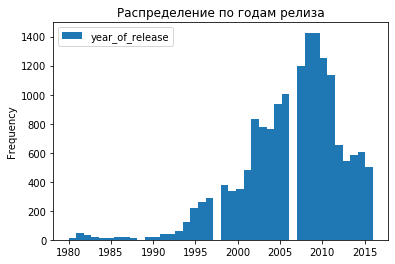

In [19]:
ax = df[df['year_of_release'] != 9999]['year_of_release'].plot(kind='hist', bins=40).legend()
plt.title('Распределение по годам релиза')
plt.show()

Игры начали выпускаться в 80-х в небольшом количестве. Затем с развитием тех.прогресса с 1993г количество игр начало расти. Пик приходиться на 2008 год, затем начинается спад, скорее всего связано с развитием сегмента мобильных игр и эрой смартфонов.

# Посмотрим как менялись продажи по платформам

In [20]:
df.groupby('platform').agg({'total_sales':'sum'}).sort_values(by='total_sales', ascending=False).head(10)

,total_sales
platform,
ps2,"1,255.77"
x360,971.42
ps3,939.65
wii,907.51
ds,806.12
ps,730.86
gba,317.85
ps4,314.14
psp,294.05


Чтож лидер по продажам PS2, затем х360 и далее по убыванию PS3, wii, DS и PS.

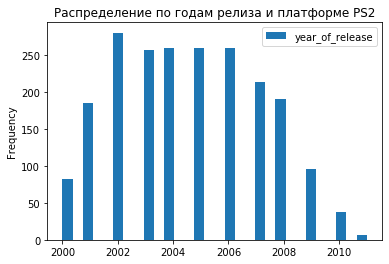

In [21]:
df[(df['year_of_release'] != 9999) & (df['platform'] == 'ps2')]['year_of_release'].plot(kind='hist', bins=30).legend()
plt.title('Распределение по годам релиза и платформе PS2')
plt.show()

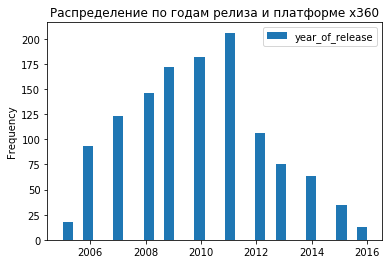

In [22]:
df[(df['year_of_release'] != 9999) & (df['platform'] == 'x360')]['year_of_release'].plot(kind='hist', bins=30).legend()
plt.title('Распределение по годам релиза и платформе x360')
plt.show()

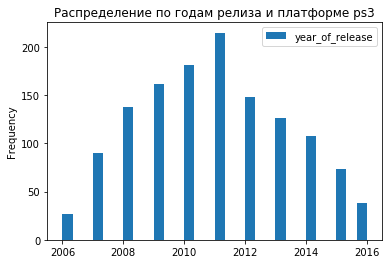

In [23]:
df[(df['year_of_release'] != 9999) & (df['platform'] == 'ps3')]['year_of_release'].plot(kind='hist', bins=30).legend()
plt.title('Распределение по годам релиза и платформе ps3')
plt.show()

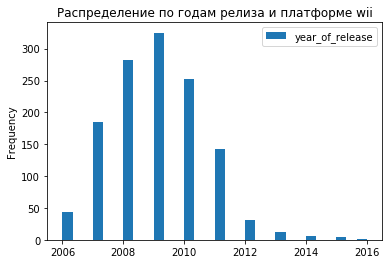

In [24]:
df[(df['year_of_release'] != 9999) & (df['platform'] == 'wii')]['year_of_release'].plot(kind='hist', bins=30).legend()
plt.title('Распределение по годам релиза и платформе wii')
plt.show()

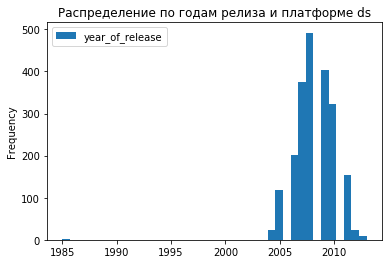

In [25]:
df[(df['year_of_release'] != 9999) & (df['platform'] == 'ds')]['year_of_release'].plot(kind='hist', bins=40).legend()
plt.title('Распределение по годам релиза и платформе ds')
plt.show()

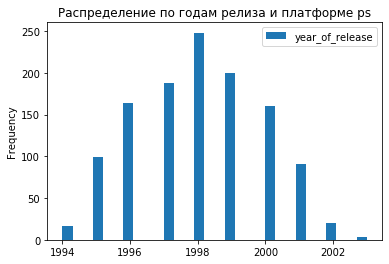

In [26]:
df[(df['year_of_release'] != 9999) & (df['platform'] == 'ps')]['year_of_release'].plot(kind='hist', bins=30).legend()
plt.title('Распределение по годам релиза и платформе ps')
plt.show()

Исходя из распределений, средний срок жизни платформы 10 лет. Обозначим его Актуальным периодом.

# Посмотрим на лидеров продаж за последние 10 лет

In [27]:
df[(df['year_of_release'] != 9999) & (df['year_of_release'] >= 2006)]\
    .groupby('platform')\
    .agg({'total_sales':'sum'})\
    .sort_values(by='total_sales', ascending=False)\
    .head()

,total_sales
platform,
x360,952.99
ps3,931.34
wii,891.18
ds,655.35
ps4,314.14


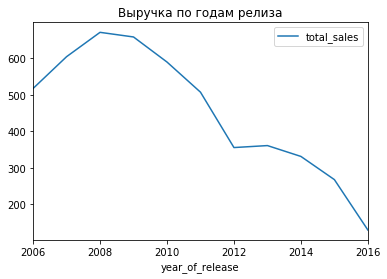

In [28]:
df[(df['year_of_release'] != 9999) & (df['year_of_release'] >= 2006)]\
    .groupby('year_of_release')\
    .agg({'total_sales':'sum'})\
    .plot()
plt.title('Выручка по годам релиза')
plt.show()

Наблюдается снижение выручки на платформах, начиная с 2008 года

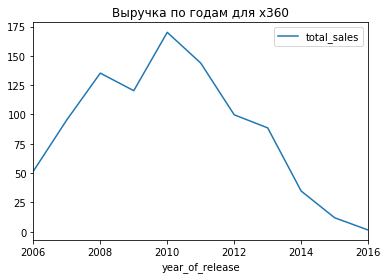

In [29]:
df[(df['year_of_release'] != 9999) & (df['year_of_release'] >= 2006) & (df['platform'] == 'x360')]\
    .groupby('year_of_release')\
    .agg({'total_sales':'sum'})\
    .plot()
plt.title('Выручка по годам для x360')
plt.show()

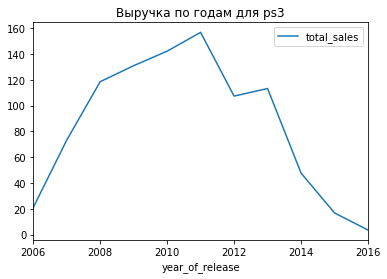

In [30]:
df[(df['year_of_release'] != 9999) & (df['year_of_release'] >= 2006) & (df['platform'] == 'ps3')]\
    .groupby('year_of_release')\
    .agg({'total_sales':'sum'})\
    .plot()
plt.title('Выручка по годам для ps3')
plt.show()

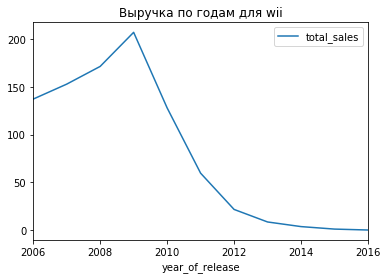

In [31]:
df[(df['year_of_release'] != 9999) & (df['year_of_release'] >= 2006) & (df['platform'] == 'wii')]\
    .groupby('year_of_release')\
    .agg({'total_sales':'sum'})\
    .plot()
plt.title('Выручка по годам для wii')
plt.show()

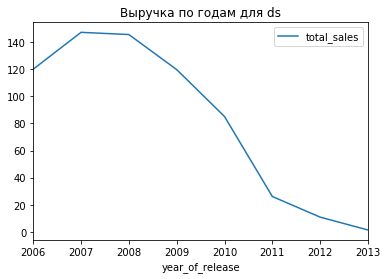

In [32]:
df[(df['year_of_release'] != 9999) & (df['year_of_release'] >= 2006) & (df['platform'] == 'ds')]\
    .groupby('year_of_release')\
    .agg({'total_sales':'sum'})\
    .plot()
plt.title('Выручка по годам для ds')
plt.show()

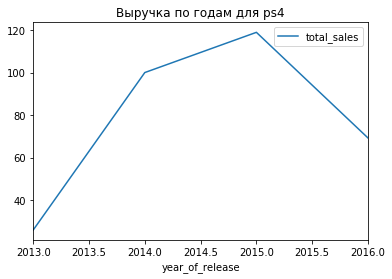

In [33]:
df[(df['year_of_release'] != 9999) & (df['year_of_release'] >= 2006) & (df['platform'] == 'ps4')]\
    .groupby('year_of_release')\
    .agg({'total_sales':'sum'})\
    .plot()
plt.title('Выручка по годам для ps4')
plt.show()

Снижение выручки характерно для всех платформ-лидеров

# Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


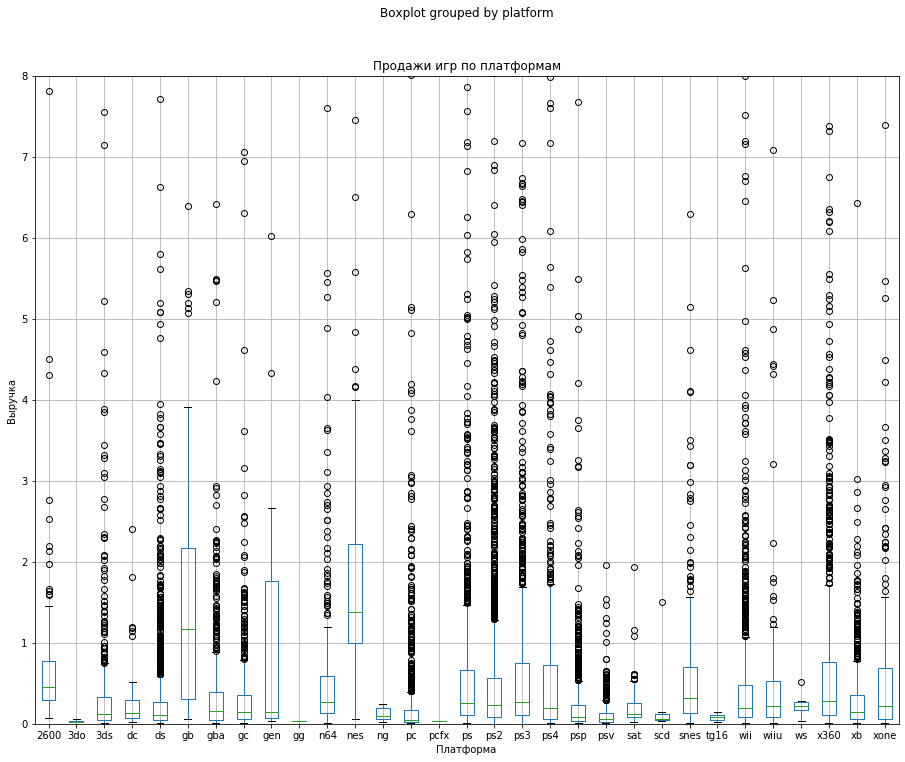

In [34]:
df.boxplot('total_sales', by='platform', figsize=(15, 12)).set_ylim(0, 8)
plt.title('Продажи игр по платформам')
plt.xlabel('Платформа')
plt.ylabel('Выручка')
plt.show()

Стандартно для рынка игр, выпустить игру и заработать, а может и уйти в минус. Выбросы объясняются наличием игр ААА класса от крупных компаний.

# Посмотрим как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

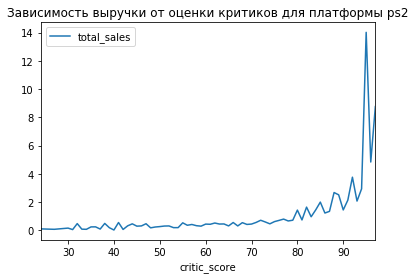

In [35]:
critics_ps2 = df[(df['critic_score'] != -1) & (df['platform'] == 'ps2')]
critics_ps2.pivot_table(index='critic_score', values='total_sales').plot()
plt.title('Зависимость выручки от оценки критиков для платформы ps2')
plt.show()

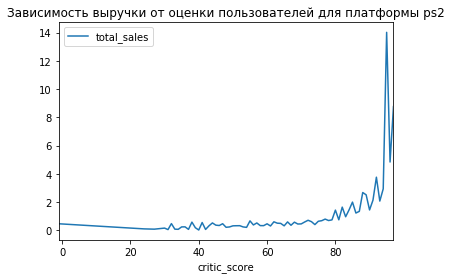

In [36]:
users_ps2 = df[(df['user_score'] != -1) & (df['platform'] == 'ps2')]
users_ps2.pivot_table(index='critic_score', values='total_sales').plot()
plt.title('Зависимость выручки от оценки пользователей для платформы ps2')
plt.show()

Чем выше оценка критиков и пользователей, тем больше выручка от релиза. Выручка от продаж растет если оценка выше 80. Графики пости идентичные, связано скорее всего с тем, что критики стараются приблизиться к мнению пользователей и нооборот некоторые пользователи слушают критиков.

In [37]:
#Посмотрим корреляцию между оценками и выручкой
score = df[(df['critic_score'] != -1) & (df['user_score'] != -1)]
df1 = score[['critic_score', 'user_score', 'total_sales']]
df1.corr(method='pearson')

,critic_score,user_score,total_sales
critic_score,1.00,0.58,0.24
user_score,0.58,1.00,0.09
total_sales,0.24,0.09,1.00


Если исходить из корреляции, то выручка находится в слабой зависимсти от оценки критиков - 24% и от оценки пользователей на 9%

# Посмотрите на общее распределение игр по жанрам.

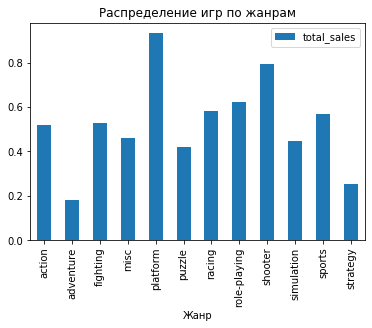

In [38]:
genre = df[(df['genre'] != 'no_genre')]
genre.pivot_table(index='genre', values='total_sales').plot(kind='bar')
plt.title('Распределение игр по жанрам')
plt.xlabel('Жанр')
plt.show()

Самые прибыльные жанры это платформеры, шутеры и ролевые игры. Внизу списка пазлы, стратегии и квесты.

Выводы:
- Пик выпуска игр приходиться на 2008 год, далее выпуск снижается. 
- По прадажам лидируют ps2, x360 и ps3. 
- Средний срок жизни платформы около 10 лет, выбрали этот срок за актуальный период. 
- При анализе ps2 ушла на покой, и лидером стал x360. 
- Что касается выручки по топ-5 платформам за 10 лет, то они демонстрируют тенденцию к снижению, как и весь рынок в целом, скорее всего связано с ростом рынка мобильных игр. 
- Игры с высокими оценками пользователей и критиков приносят больше прибыли, но сильной взаимосвязи между этими показателями не наблюдается 24 и 9 % соответственно, скорее всего большую роль играют бюджеты рекламных компаний от крупных издателей. 
- Ну и самые прибыльные жанры это платформеры, шутеры и ролевые игры.

# Этап 4. Составим портрет пользователя для каждого региона

Определите для пользователя каждого региона (NA, EU, RU):

- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

# Самые популярные платформы(топ-5).

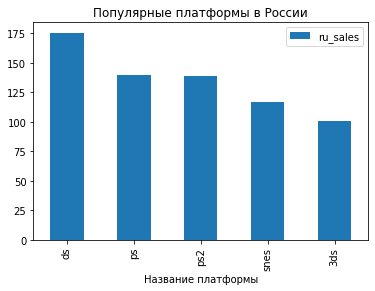

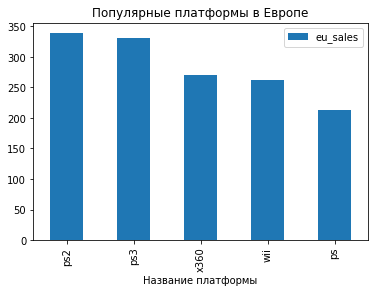

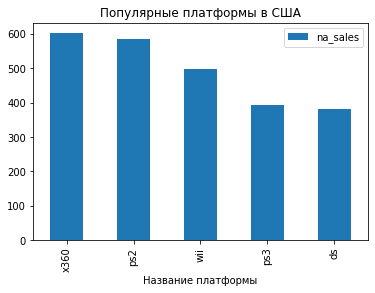

In [39]:
df.groupby(by='platform').agg({'ru_sales':'sum'}).sort_values(by='ru_sales', ascending=False).head(5).plot(kind='bar')
plt.title('Популярные платформы в России')
plt.xlabel('Название платформы')
df.groupby(by='platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
plt.title('Популярные платформы в Европе')
plt.xlabel('Название платформы')
df.groupby(by='platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')
plt.title('Популярные платформы в США')
plt.xlabel('Название платформы')
plt.show()

В России популярна Денди, в Европе - PS2, в США - x360. 

# Самые популярные жанры(топ-5).

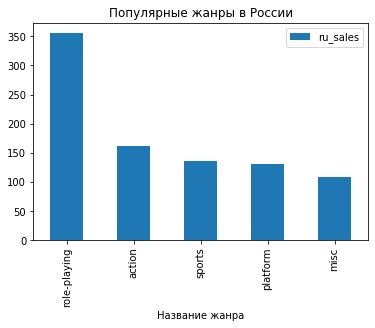

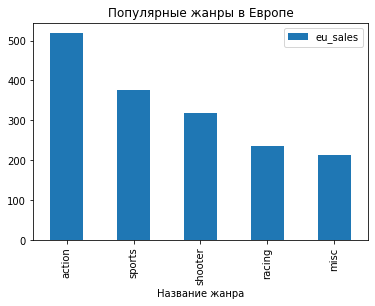

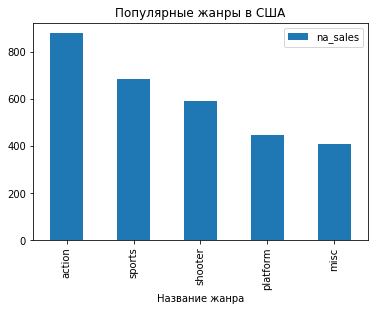

In [40]:
df.groupby(by='genre').agg({'ru_sales':'sum'}).sort_values(by='ru_sales', ascending=False).head(5).plot(kind='bar')
plt.title('Популярные жанры в России')
plt.xlabel('Название жанра')
df.groupby(by='genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
plt.title('Популярные жанры в Европе')
plt.xlabel('Название жанра')
df.groupby(by='genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')
plt.title('Популярные жанры в США')
plt.xlabel('Название жанра')
plt.show()

Среди жанров в РФ популярны ролевые игры. В США и Европе экшены.

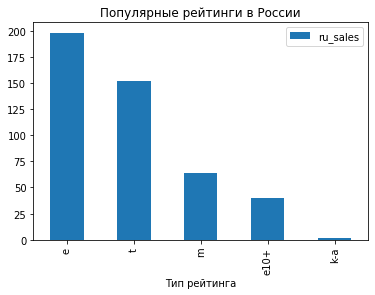

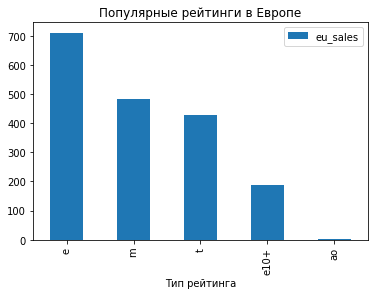

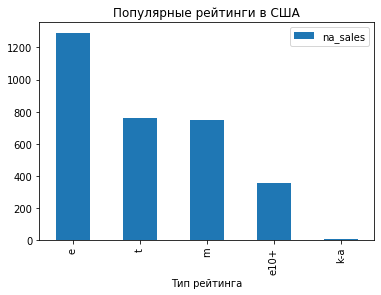

In [41]:
rating_type = df[(df['rating_type'] != 'out of rating')]
rating_type.groupby(by='rating_type').agg({'ru_sales':'sum'}).sort_values(by='ru_sales', ascending=False).head(5).plot(kind='bar')
plt.title('Популярные рейтинги в России')
plt.xlabel('Тип рейтинга')
rating_type.groupby(by='rating_type').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
plt.title('Популярные рейтинги в Европе')
plt.xlabel('Тип рейтинга')
rating_type.groupby(by='rating_type').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')
plt.title('Популярные рейтинги в США')
plt.xlabel('Тип рейтинга')
plt.show()

Самым популярным рейтингом, является рейтинг для всех "е", объясняется большим охватом аудитории. Далее в России и США популярен рейтинг от 13-19 лет, затем от 17 лет. В Европе предпочтения меняются от 17 лет, затем от 13-19.

# Этап 5. Проверьте гипотезы

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. 
  
Задайте самостоятельно пороговое значение alpha.

Поясните:

- Как вы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.

Будем использовать t-критерий Стьюдента, так как сравниваемые выборки независимы между собой.

Гипотезы:
- H0: средний пользовательский рейтинг платформ Xbox One и PC одинаковый
- H1: средний пользовательский рейтинг платформ Xbox One и PC различается

In [42]:
alpha = 0.05

In [43]:
xone = df[(df['platform'] == 'xone') & (df['user_score'] > 0)]['user_score']
pc = df[(df['platform'] == 'pc') & (df['user_score'] > 0)]['user_score']

In [44]:
results = st.ttest_ind(xone, pc)

In [45]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.3896435533548819e-05
Отвергаем нулевую гипотезу


Средний пользовательский рейтинг платформ Xbox One и PC различается

Гипотезы:
- H0: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые
- H1: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

In [46]:
alpha = 0.05

In [47]:
action = df[(df['genre'] == 'action') & (df['user_score'] > 0)]['user_score']
sports = df[(df['genre'] == 'sports') & (df['user_score'] > 0)]['user_score']

In [48]:
results = st.ttest_ind(action, sports)

In [49]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10406951359049141
Не получилось отвергнуть нулевую гипотезу


Средние пользовательские рейтинги жанров экшен и спорт одинаковые

# Этап 6. Общий вывод

Чтож Стримчику стоит обратить внимание на следующие факторы при планировании продаж на 2017 год:
- Учесть тенденцию к спаду рынка игр;
- Сделать упор на игры популярных жанров;
- Предпочтительный рейтинг для всех;
- Настроить предложения игр в магазине в соответствии с регионами, в которых находятся пользователи;
- Выбирать игры с высоким рейтингом от критиков и пользователей;